In [20]:
import numpy as np
samples = np.load('samples.npy')
samples.shape

(156800, 7)

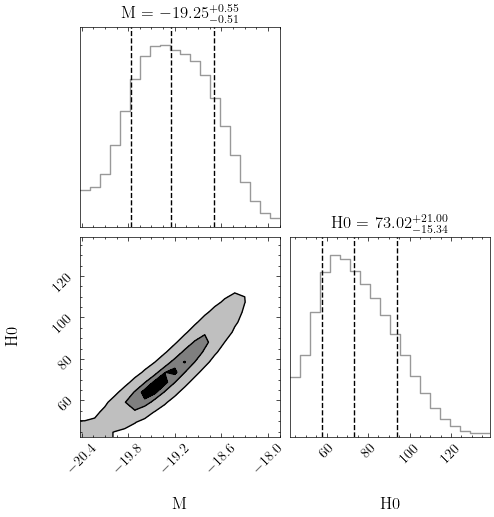

In [34]:
import corner
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

labels = ['H0', 'OmegaM', 'OmegaDE', 'w', 'alpha', 'beta', 'M']
# only plot 'H0', 'M'
# make the plot a bit bigger and more beautiful and colorful
corner.corner(samples[:,[6,0]], labels=[labels[6],labels[0]], quantiles=[0.16, 0.5, 0.84], truths=[70, -19.3],
show_titles=True, title_kwargs={"fontsize": 12}, label_kwargs={"fontsize": 12}, hist_kwargs={"color": "black", "alpha": 0.4}, smooth=1, smooth1d=1, levels=(1-np.exp(-0.2), 1-np.exp(-0.5), 1-np.exp(-2)), fill_contours=True, plot_datapoints=False, plot_density=False, plot_contours=True, no_fill_contours=False, use_math_text=True)

plt.savefig('H0.png', dpi=300, bbox_inches='tight')


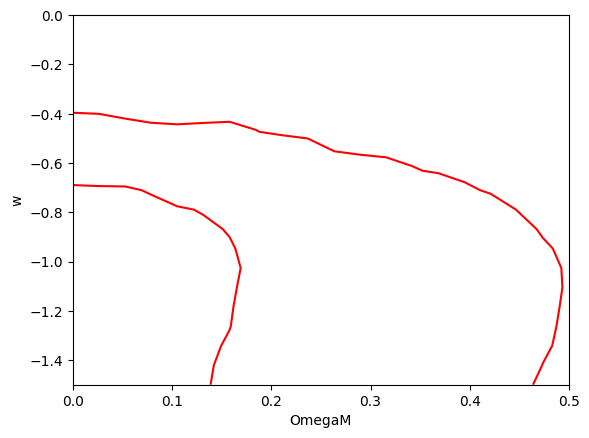

In [22]:
# OmegaM v.s. w
import matplotlib.pyplot as plt
plt.figure()
# plt.scatter(samples[:,1], samples[:,3], alpha=0.1, s=1)
# plot contours: 68.3%, 95.4%, and 99.7%
import scipy.stats
X, Y = np.mgrid[0.:0.5:20j, -1.5:0.:20j]
positions = np.vstack([X.ravel(), Y.ravel()])
kernel = scipy.stats.gaussian_kde(samples[1000:,[1,3]].T)
Z = np.reshape(kernel(positions).T, X.shape)
plt.contour(X, Y, Z, levels=(1.-scipy.stats.norm.cdf(1.0), ), colors='r')

plt.xlim(0., 0.5)
plt.ylim(-1.5, 0.)
plt.xlabel('OmegaM')
plt.ylabel('w')
plt.show()